In [1]:
# ==========================================
# Task 1: Import Required Libraries
# ==========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import geopandas as gpd
import folium

print("Libraries imported successfully")

Libraries imported successfully


First 5 rows of the dataset:


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


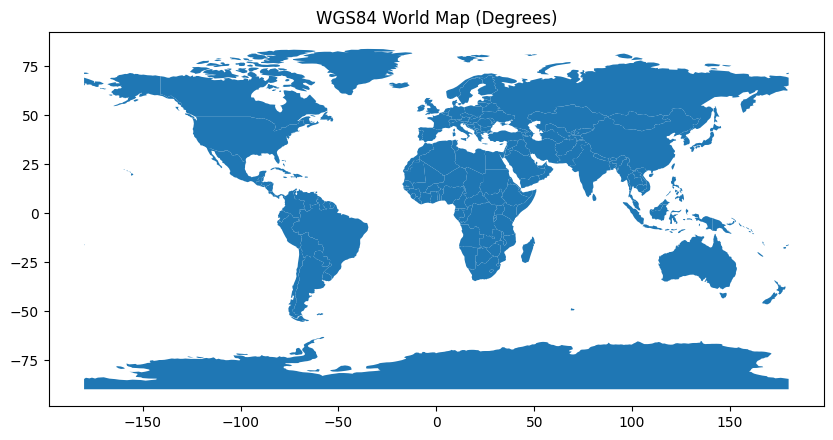

In [7]:
# ==========================================
# Task 2: Load Natural Earth Dataset
# ==========================================
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

# Display preview
print("First 5 rows of the dataset:")
display(world.head())

# First Visualization: WGS84 World Map (Degrees)
world.plot(figsize=(10, 5))
plt.title("WGS84 World Map (Degrees)")
plt.show()

Task 2 Questions:

1. How many columns does the dataset contain?

The dataset contains 169 columns.

2. What type of geometries are included?

It includes Polygon and MultiPolygon geometries.

3. What does the geometry column represent?

It represents the spatial coordinates that define the physical shape and boundary of each country.

In [3]:
# ==========================================
# Task 3: Check the Coordinate Reference System
# ==========================================
print(f"Current CRS: {world.crs}")
# Explanation: EPSG:4326 represents the WGS84 geographic coordinate system (lat/long).

Current CRS: EPSG:4326


Task 3 Questions:

1. What does EPSG:4326 represent?

It represents the WGS84 geographic coordinate system, which uses latitude and longitude in degrees.

2. Why is CRS important in spatial analysis?

It ensures that earth's 3D coordinates are accurately translated to a 2D plane, preventing measurement errors in distance or area.

In [4]:
# ==========================================
# Task 4: Convert to Metric CRS for Area Calculation
# ==========================================
# Convert to Web Mercator (meters)
world_projected = world.to_crs(epsg=3857)

# Compute Area in square meters
world_projected["area_m2"] = world_projected.geometry.area

# Display the ADMIN name and calculated area
display(world_projected[["ADMIN", "area_m2"]].head())
print("\nArea Reprojection ✅ complete")

,ADMIN,area_m2
0,Fiji,2.128334e+10
1,United Republic of Tanzania,9.522552e+11
2,Western Sahara,1.171023e+11
3,Canada,5.216648e+13
4,United States of America,2.186228e+13



Area Reprojection ✅ complete


Task 4 Questions:

1. Why can’t we compute area accurately using EPSG:4326?

Because degrees vary in physical length depending on latitude, making area calculations inconsistent across the globe.

2. What unit is EPSG:3857 based on?

 It is based on meters.

Centroid coordinates (X, Y):


,ADMIN,x,y
0,Fiji,1.824878e+07,-1.958098e+06
1,United Republic of Tanzania,3.869296e+06,-7.003071e+05
2,Western Sahara,-1.348403e+06,2.794163e+06
3,Canada,-1.079779e+07,1.044422e+07
4,United States of America,-1.329713e+07,6.667416e+06


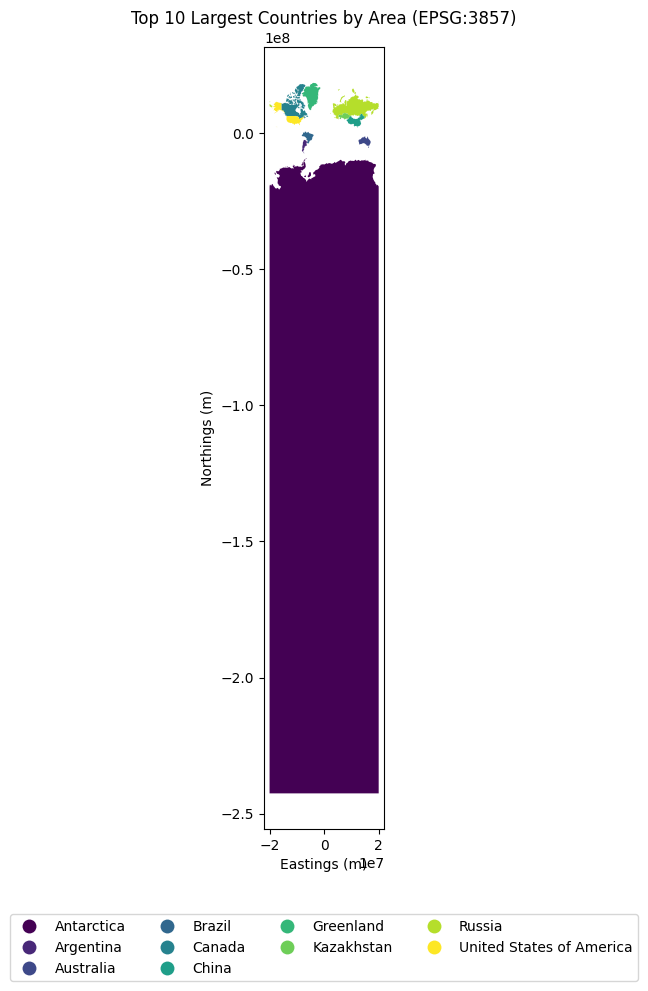

In [10]:
# ==========================================
# Task 5: Extract Centroid Coordinates
# ==========================================
# Extracting the geometric center of each country
world_projected["centroid"] = world_projected.geometry.centroid
world_projected["x"] = world_projected.centroid.x
world_projected["y"] = world_projected.centroid.y

# Display centroid coordinates
print("Centroid coordinates (X, Y):")
display(world_projected[["ADMIN", "x", "y"]].head())



# ==========================================
# Task 5 (continued): Plot the top 10 largest countries
# ==========================================
top_10 = world_projected.sort_values(by="area_m2", ascending=False).head(10)

# Final Visualization
ax = top_10.plot(
    column="ADMIN",
    cmap="viridis",
    legend=True,
    figsize=(10, 10),
    legend_kwds={'loc': 'upper center', 'bbox_to_anchor': (0.5, -0.1), 'ncol': 4}
)

plt.title("Top 10 Largest Countries by Area (EPSG:3857)")
plt.xlabel("Eastings (m)")
plt.ylabel("Northings (m)")

plt.tight_layout()
plt.show()

Task 5 Questions:

1. What is a centroid?

 It is the geometric center point or "center of mass" of a polygon.

 2. How can centroid coordinates be used in clustering?

 They provide numeric x and y features that can be used in algorithms like K-Means to group regions by geographic location.

 3. Why do we extract X and Y separately?

 To provide individual numeric features that standard machine learning models can process.

Documentation Screenshots

Found 5 image(s) in '/content/':
Displaying: /content/Task 1.png


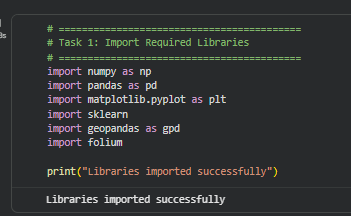


---

Displaying: /content/Task 2.png


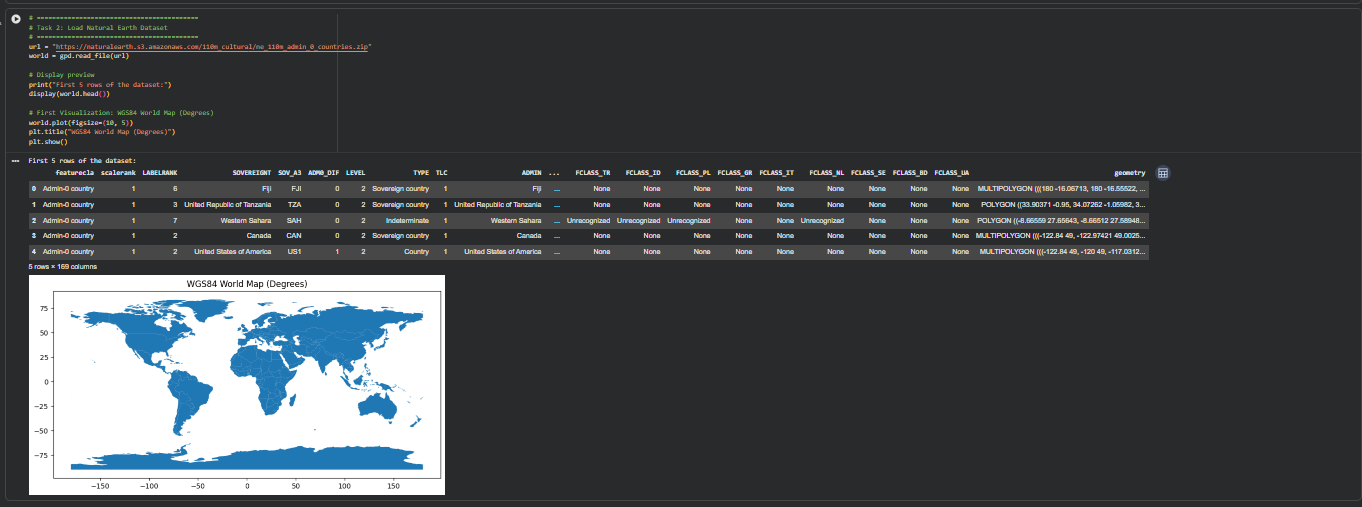


---

Displaying: /content/Task 3.png


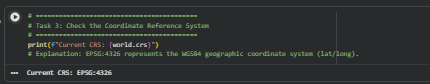


---

Displaying: /content/Task 4.png


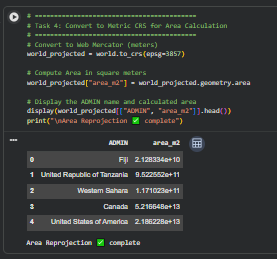


---

Displaying: /content/Task 5.png


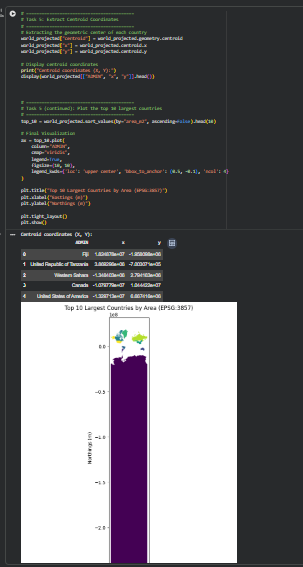


---



In [12]:
import glob
from IPython.display import Image, display
import os


screenshots_directory = '/content/'


if not os.path.exists(screenshots_directory):
    print(f"Directory '{screenshots_directory}' does not exist. Please create it or specify a different path.")
else:

    image_extensions = ['*.png', '*.jpg', '*.jpeg', '*.gif']


    image_files = []
    for ext in image_extensions:
        image_files.extend(glob.glob(os.path.join(screenshots_directory, ext)))

    if not image_files:
        print(f"No image files found in '{screenshots_directory}' with extensions {image_extensions}.")
    else:
        print(f"Found {len(image_files)} image(s) in '{screenshots_directory}':")
        for img_path in sorted(image_files):
            print(f"Displaying: {img_path}")
            display(Image(filename=img_path))
            print("\n---\n")

# Reflection



This laboratory activity provided a practical understanding of how Coordinate Reference Systems (CRS) impact the integrity of spatial data analysis. I initially identified the dataset's native CRS as EPSG:4326, which utilizes angular degrees. However, I learned that for accurate metric computations like area and centroid extraction, it is necessary to reproject the data into a planar metric system like EPSG:3857.A primary challenge encountered was the extreme visual distortion of landmasses near the poles, particularly Antarctica, which appeared significantly larger than its actual relative size. I realized this is a mathematical byproduct of the Web Mercator projection's cylindrical nature, where area scale increases with latitude. Despite this distortion, the transformation was essential for extracting the $x$ and $y$ centroid coordinates into separate numerical variables.In the context of machine learning, this exercise demonstrated that geospatial data must be pre-processed into a standard metric format before it can be used as features for algorithms like clustering or spatial regression. Effectively handling these projections ensures that the underlying spatial relationships are numerically preserved for model training.

